# Introduction

We are interested in the following data based on these files:

### loc/comparison

- LOC diff per project
- files diff per project

### summary_lang_specific

- FN per project
- FP per project
- Detection% per project
- Deviation% per project

### rules_summary

- FN per rule
- FP per rule
- Detection% per rule
- Deviation% per rule

### noisy_rules

- FN per rule
- FP per rule

In [117]:
# DEFINITIONS

BASE_PATH = "../output/"
DELIMITER = ";"
PLOT_W = 20
PLOT_H = 10

In [118]:
# BASE

import matplotlib.pyplot as plt
import numpy as np

# plt.style.use('_mpl-gallery')

def sort_zipped_single(labels, values):
    zipped = zip(labels,values)
    s = sorted(zipped, key=lambda x:x[1])
    return tuple(zip(*s))

def sort_zipped_double(labels, left, right, comparer):
    zipped = zip(labels,left,right)
    s = sorted(zipped, key=comparer)
    return tuple(zip(*s))

def generate_grouped_bars_sort_by_diff(labels, values1, values2, label1, label2, ylabel="", title =""):
    comparer = lambda x:abs(x[1]-x[2])
    generate_grouped_bars(labels, values1, values2, label1, label2, comparer, ylabel, title)

def generate_grouped_bars_sort_by_sum(labels, values1, values2, label1, label2, ylabel="", title =""):
    comparer = lambda x:x[1]+x[2]
    generate_grouped_bars(labels, values1, values2, label1, label2, comparer, ylabel, title)

def generate_grouped_bars(labels, values1, values2, label1, label2, comparer, ylabel="", title =""):
    x = np.arange(len(labels))  # the label locations
    width = 0.15  # the width of the bars

    labels,values1,values2 = sort_zipped_double(labels,values1, values2, comparer)

    fig, ax = plt.subplots()
    fig.set_size_inches(PLOT_W, PLOT_H)
    rects1 = ax.bar(x - width/2, values1, width, label=label1)
    rects2 = ax.bar(x + width/2, values2, width, label=label2)

    # Add some text for labels, title and custom x-axis tick labels, etc.
    ax.set_ylabel(ylabel)
    ax.set_title(title)
    ax.set_xticks(x, labels)
    ax.legend()

    ax.bar_label(rects1, padding=2)
    ax.bar_label(rects2, padding=2)

    fig.tight_layout()

    plt.show()

def generate_single_bars(labels, values, ylabel="", title =""):
    fig, ax = plt.subplots()

    labels, values = sort_zipped_single(labels, values)
    
    ax.bar(labels, values)
    ax.set_ylabel(ylabel)
    ax.set_title(title)

    plt.show()

### Lines of code before vs after per project

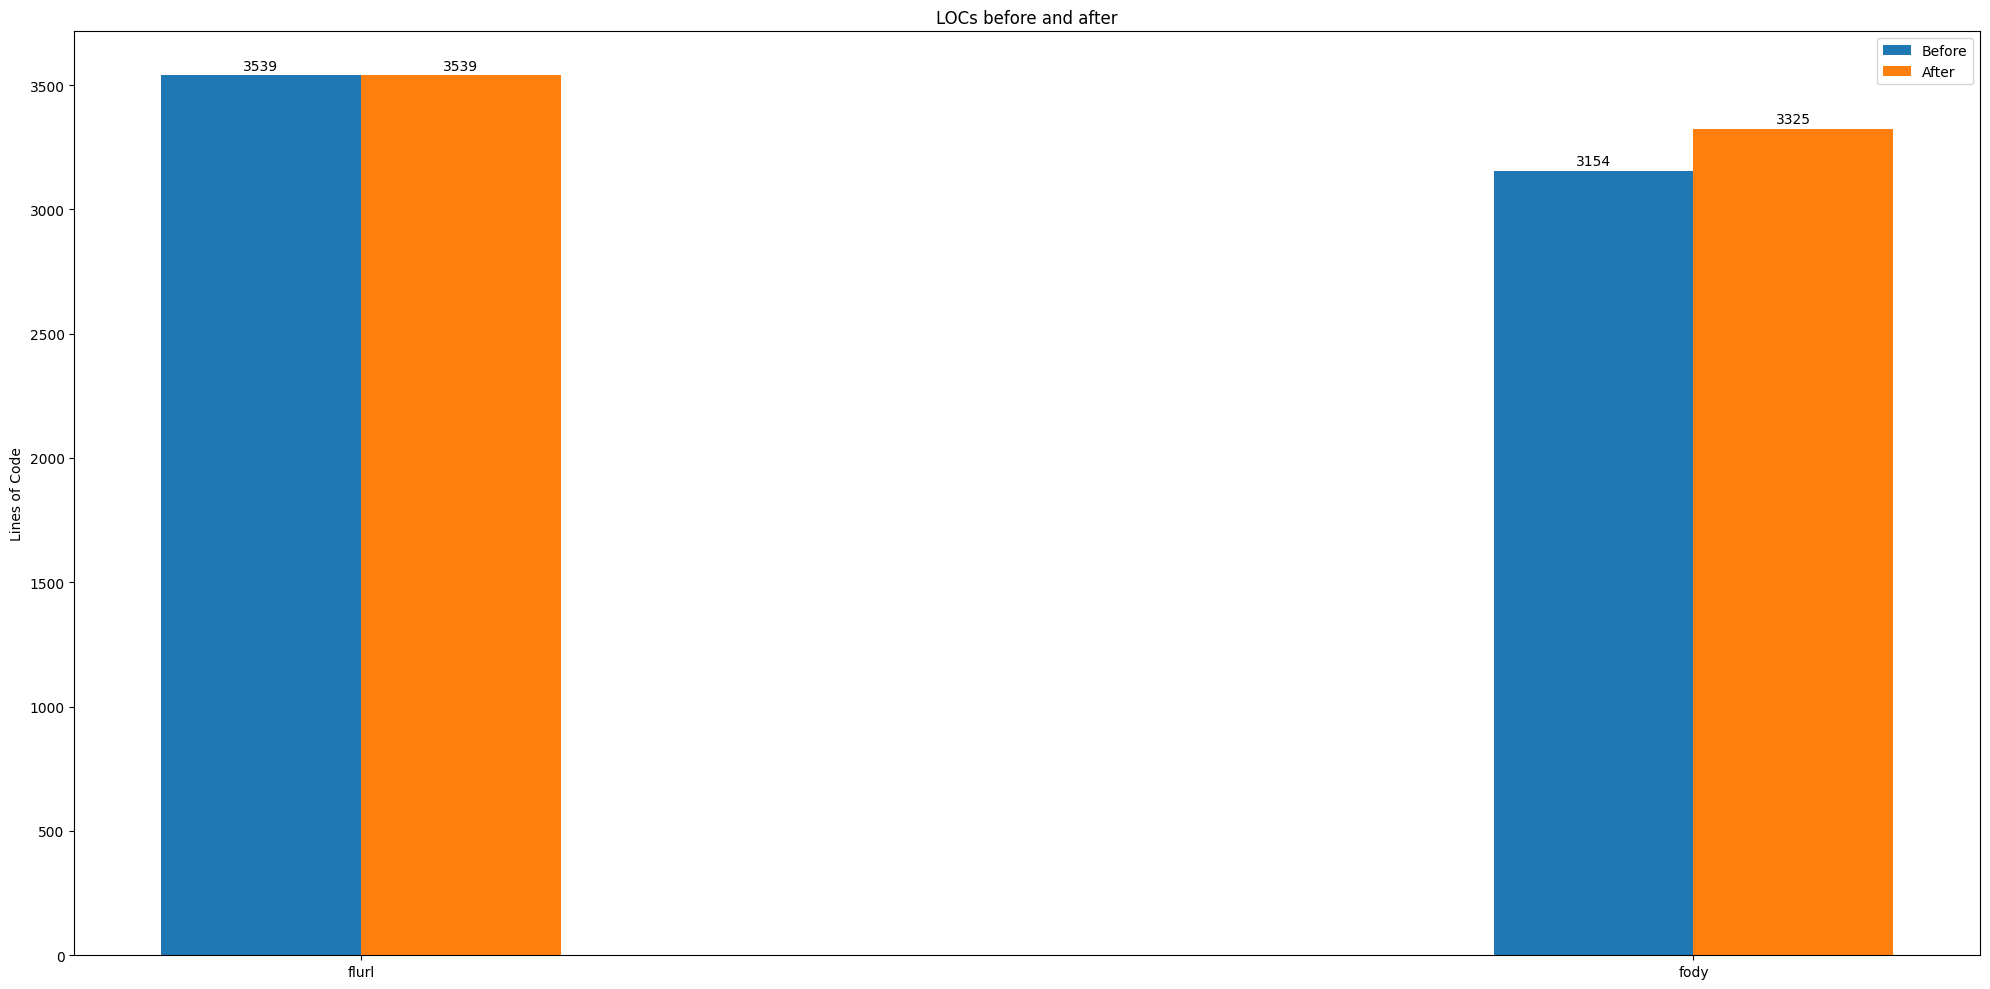

In [119]:
import matplotlib.pyplot as plt
import numpy as np
import os

path = BASE_PATH + "loc/comparison"

with open(path, "rt") as f:
    lines = f.readlines()

splitted = [l.split(DELIMITER) for l in lines[1:]]
labels = [l[0] for l in splitted]
loc_before = [int(l[1]) for l in splitted]
loc_after = [int(l[2]) for l in splitted]

generate_grouped_bars_sort_by_diff(
    labels, loc_before, loc_after, "Before", "After","Lines of Code", "LOCs before and after")

### Files before and after per project

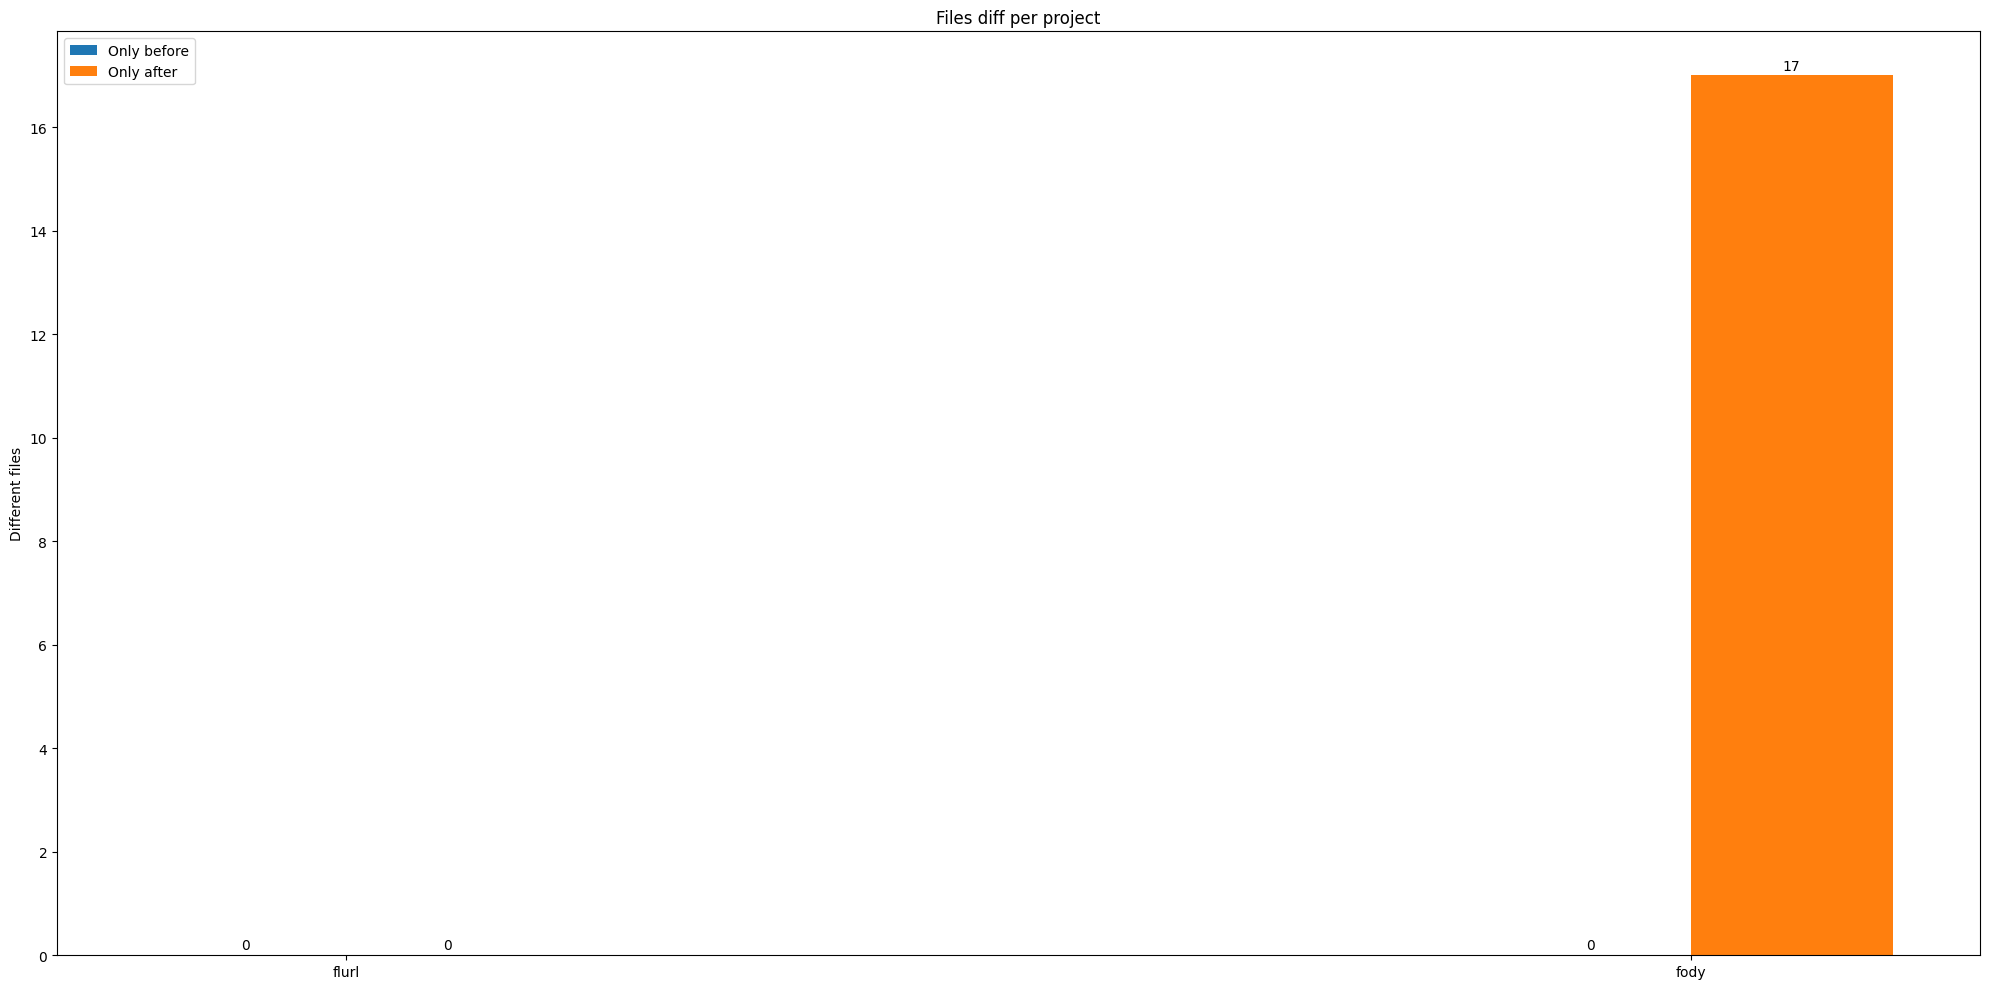

In [120]:
import matplotlib.pyplot as plt
import numpy as np
import os

path = BASE_PATH + "loc/comparison"

with open(path, "rt") as f:
    lines = f.readlines()

splitted = [l.split(DELIMITER) for l in lines[1:]]
labels = [l[0] for l in splitted]

added_before = [int(l[4]) for l in splitted]
added_after = [int(l[3]) for l in splitted]

generate_grouped_bars_sort_by_diff(
    labels, added_before, added_after, "Only before", "Only after","Different files", "Files diff per project")

### FN/FP per project

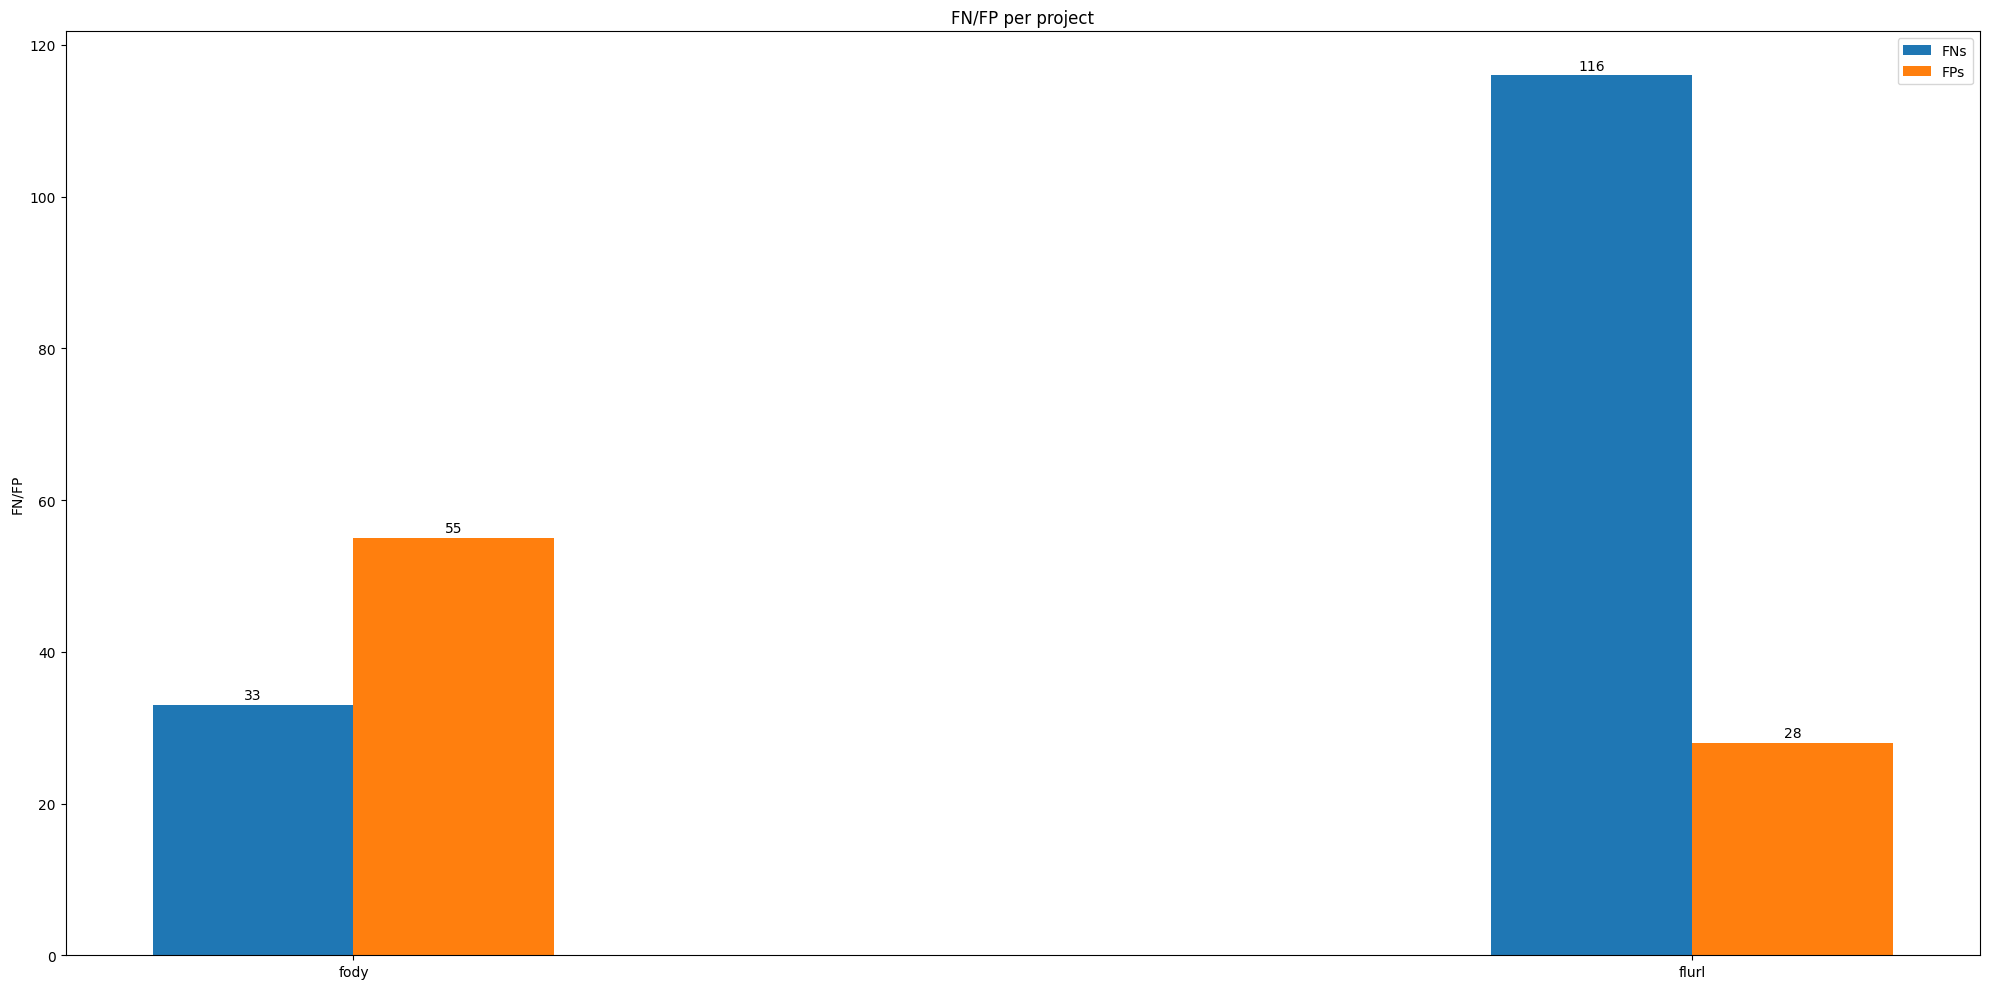

In [121]:
import matplotlib.pyplot as plt
import numpy as np
import os

path = BASE_PATH + "summary_lang_specific"

def get_valid_lines(lines):
    valid = []
    for l in lines[3:]:
        if l.startswith("======"):
            return valid
        else:
            valid.append(l)

with open(path, "rt") as f:
    lines = f.readlines()
    lines = get_valid_lines(lines)

splitted = [l.split(DELIMITER) for l in lines]
labels = [l[0] for l in splitted]

fns = [int(l[2]) for l in splitted]
fps= [int(l[4]) for l in splitted]

generate_grouped_bars_sort_by_sum(
    labels, fns, fps, "FNs", "FPs","FN/FP", "FN/FP per project")

### Detection% per project

In [125]:
import matplotlib.pyplot as plt


path = BASE_PATH + "summary_lang_specific"

def get_valid_lines(lines):
    valid = []
    for l in lines[3:]:
        if l.startswith("======"):
            return valid
        else:
            valid.append(l)

with open(path, "rt") as f:
    lines = f.readlines()
    lines = get_valid_lines(lines)

splitted = [l.split(DELIMITER) for l in lines]
labels = [l[0] for l in splitted]
detections = [float(l[3].replace(",",".")) for l in splitted]

generate_single_bars(labels, detections, ylabel="some label", title="title")


ValueError: invalid literal for int() with base 10: '85,922330'